In [34]:
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import joblib


import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)


# loading the data

In [5]:
df = joblib.load(open('/data/reddit/imbalanced_sample_data.pkl', 'rb'))
#df = df.sample(len(df))

In [6]:
good_subreddits = pd.read_csv('good_subreddits.csv')
good_subreddits['subreddit'] = [s.replace('www.reddit.com/r/', '') for s in good_subreddits.subreddit]            
good_subreddit_set = set(good_subreddits.subreddit)

In [7]:
subreddit_to_topic = dict()

topic_columns = [f'level{i}' for i in range(1,4)]

for rd in good_subreddits.to_dict(orient='rows'):
    topics = [rd[c] for c in topic_columns]
    topics = [s for s in topics if type(s) == str and len(s) > 0]
    topics = '; '.join(topics)
    subreddit_to_topic[rd['subreddit']] = topics

In [8]:
df = df[df.subreddit.isin(good_subreddit_set)]

df = df.copy()

In [9]:
df['topic'] = [subreddit_to_topic[s] for s in df.subreddit]

In [10]:
df['text'] = df[['title', 'selftext']].apply(lambda x: ' ||| '.join(x), axis=1)

In [12]:
import datetime
from datetime import timezone

def clip_to_month(utc):
    dt = datetime.datetime.fromtimestamp(utc)
    date = datetime.datetime(dt.year, dt.month, 1)
    return date.replace(tzinfo=datetime.timezone.utc).timestamp()
    
df['clipped_created_utc'] = df['created_utc'].apply(clip_to_month)

In [13]:
joblib.dump(df, open('/data/reddit/imbalanced_sample_data_cleaned.pkl', 'wb'))

# data investigation

**A word of warning : drawing graphs in Jupyter is one thing, but it doesn't beat good-old-fashioned... manually reading through thousands of examples to really get a feel for what your data actually is.  This is especially important when you have many classes as your data is going to cover a broad range of domains, you need to at least try and get familiar with the most common classes. If you don't do this you risk missing key insights**

In [14]:
df.columns

Index(['author', 'created', 'created_utc', 'distinguished', 'id', 'score',
       'selftext', 'subreddit', 'title', 'topic', 'text',
       'clipped_created_utc'],
      dtype='object')

In [15]:
df.sample(10)

,author,created,created_utc,distinguished,id,score,selftext,subreddit,title,topic,text,clipped_created_utc
1820982,spencerdrake5,NaN,1482015818,None,5ix6y8,2,how do you think the liars will react to spenc...,PrettyLittleLiars,spencer drake,tv_show; pretty little liars,spencer drake ||| how do you think the liars w...,1.480550e+09
5740277,[deleted],NaN,1515379442,None,7ovh3d,9,I used to be an antifeminist myself and watche...,AskFeminists,What do you think of the antifeminist presence...,politics/viewpoint; feminism,What do you think of the antifeminist presence...,1.514765e+09
163545,aikonriche,NaN,1466371737,None,4ovaq0,7,1. Did pagans tried their best to kill those w...,exmuslim,Questions about Islamic history?,religion/supernatural; islamism,Questions about Islamic history? ||| 1. Did pa...,1.464739e+09
1593903,pingomg,NaN,1480002377,None,5eobd2,14,I am using PCGen to make a PC for an upcoming ...,Pathfinder_RPG,[PCGen] How do you make a Shadowcaster,rpg; pathfinder,[PCGen] How do you make a Shadowcaster ||| I a...,1.477958e+09
5700059,ehhwinop,NaN,1515059793,None,7o20nd,5,The one piece world brings a multitude of char...,OnePiece,People underestimate Non pirates non marines n...,anime/manga; one piece,People underestimate Non pirates non marines n...,1.514765e+09
3642680,jackmasta01,NaN,1497744759,None,6hwrlo,6,A few times i've read and some post said LPR i...,GERD,Why is LPR (silent reflux) considered non acid...,health; gerd,Why is LPR (silent reflux) considered non acid...,1.496275e+09
632747,fanofthenightladies,NaN,1470966212,None,4xb6a2,0,I know there are male strippers and clubs that...,Hookers,Can a straight male escort make decent money s...,profession; sex workers,Can a straight male escort make decent money s...,1.470010e+09
6073904,DisposablePanda,NaN,1517978725,None,7vtnx9,28,Towards the end of the last show they discusse...,PKA,Missed opportunity without Taylor?,podcast/video_blog; painkiller already,Missed opportunity without Taylor? ||| Towards...,1.517443e+09
314199,isortaliketomcruise,NaN,1467863625,None,4rml7z,3,I realize this is can be an extremely broad to...,Epilepsy,Driving.,health; epilepsy,Driving. ||| I realize this is can be an extre...,1.467331e+09
1409855,ProfessorPush,NaN,1478278985,None,5b4re5,18,Now is the time to register those alt names yo...,Eve,A Friendly Reminder,video_game; eve online,A Friendly Reminder ||| Now is the time to reg...,1.477958e+09


### categories

In [16]:
topic_dict = defaultdict(set)

for topic in set(df.topic):
    topics_clipped = topic.split('; ')[:2]
    cat, subcat = topics_clipped
    
    topic_dict[cat].add(subcat)

In [17]:
import random

for k, subcat in list(topic_dict.items()):
    print(k)
    for s in subcat:
        print('\t', s)

sports
	 volleyball
	 running
	 tennis
	 archery
	 indycar
	 roller blading
	 roller derby
	 electric skateboarding
	 baseball
	 triathlon
	 kayaking
	 mma
	 soccer
	 skiing
	 hockey
	 weightlifting/strength training
	 equestrian
	 rugby
	 surfing
	 snowboarding
	 football
	 ju jitsu
	 lacrosse
	 boxing
	 cycling
	 wrestling
	 obstacle course
	 mountain biking
	 basketball
	 billiards
	 bowling
	 swimming
	 darts
	 climbing
	 nascar
	 skateboarding
	 golf
	 formula 1
	 rowing
	 olympics
	 cricket
	 fencing
	 disc golf
video_game
	 wizard 101
	 stalker
	 megaten
	 elite
	 tree of savior
	 crash bandicoot
	 foxhole
	 slay the spire
	 idle heroes
	 nioh
	 realm of the mad god
	 disney magic kingdom
	 victoria 2
	 rocksmith
	 god of war
	 wolfenstein
	 clicker heroes
	 yogscast
	 yokai watch
	 tibia
	 uncharted
	 the culling
	 team fortress
	 diep.io
	 splatoon
	 endless frontier
	 animal crossing
	 gigantic
	 boom beach
	 battletech
	 rising storm
	 resident evil
	 maple story
	 battlerit

	 million dollar extreme
	 z reviews
	 h3h3
	 sargon of akkad
	 howard stern
	 drunken peasants
	 ice poseidon
	 joe rogan
	 the dick show
	 game grumps
	 red letter media
	 hutts gaming
advice/question
	 discipline
	 words
	 immigration
	 book
	 valuation
	 stopping gaming
	 name advice
	 legal advice
	 song
	 declutter
	 internet cessation
	 translation
	 gift ideas
programming
	 swift
	 android
	 php
	 vim
	 django
	 java
	 matlab
	 sql
	 c
	 javascript
	 excel
	 go
	 css/html
	 ios
	 r
	 haskell
	 rust language
	 ruby
	 docker
	 python
	 hosting
	 git
	 bash
	 hacking
	 dot net
parenting
	 abortion
	 diapers
	 infertility
	 sleep training
	 step parenting
	 pregnancy
	 miscarriage
	 conception
	 breast feeding
	 adoption
	 naming
	 birth control
	 twins/multiples
card_game
	 girls x battle
	 netrunner
	 eternal card game
	 card fight
	 legend of the five rings
	 poker
	 dc universe
	 dragon ball z
	 shadowverse
	 pauper
	 dragon ball
	 force of will
	 final fantasy
	 magic the gath

In [ ]:
## draw some graphs

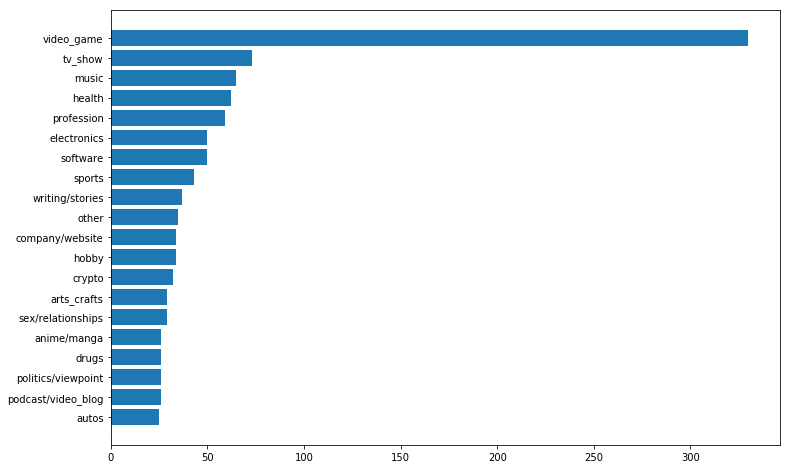

In [18]:
category_to_num = {k : len(v) for k,v in topic_dict.items()}
ctr = Counter(category_to_num)
pairs = list(ctr.most_common(20))
pairs = list(reversed(pairs))
categories, nums = zip(*pairs)

plt.barh(categories, nums)
plt.show()

In [19]:
subreddit_counter = Counter(df.topic)

In [20]:
subreddit_counter.most_common(20)

[('video_game; league of legends', 141366),
 ('video_game; hearthstone', 88964),
 ('video_game; dota', 85739),
 ('video_game; fortnite', 60596),
 ('video_game; heroes of the storm', 60387),
 ('video_game; dark souls', 57152),
 ('video_game; fifa', 57030),
 ('video_game; runescape', 55664),
 ('video_game; rocket league', 52358),
 ('video_game; clash royale', 51206),
 ('health; anxiety', 50348),
 ('video_game; war frame', 50201),
 ('other; who would win', 44595),
 ('video_game; smite', 44438),
 ('stem; computer science', 42929),
 ('hobby; diy', 41927),
 ('writing/stories; jokes', 39243),
 ('animals; dogs', 38029),
 ('parenting; pregnancy', 37738),
 ('sex/relationships; gay', 37335)]

In [21]:
counts = [x[1] for x in subreddit_counter.most_common()]
np.array(counts)

array([141366,  88964,  85739, ...,   1013,   1012,   1007])

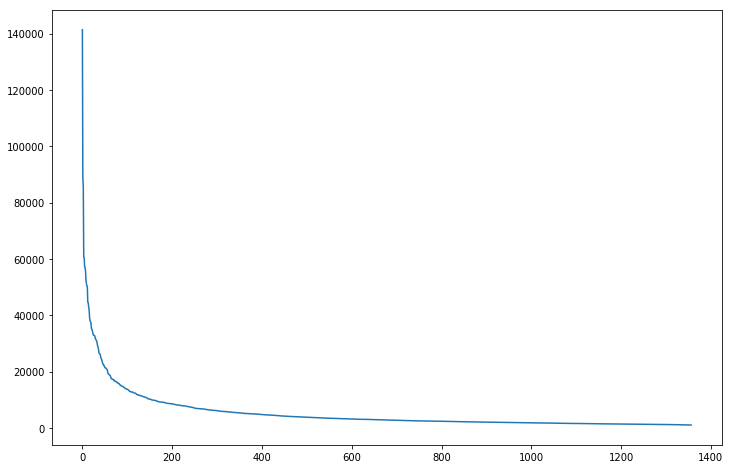

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(range(len(counts)), counts)


In [25]:
total = sum(counts)

cum_sum = np.cumsum(counts)
cum_sum = 100 * cum_sum / total

(0, 1357)

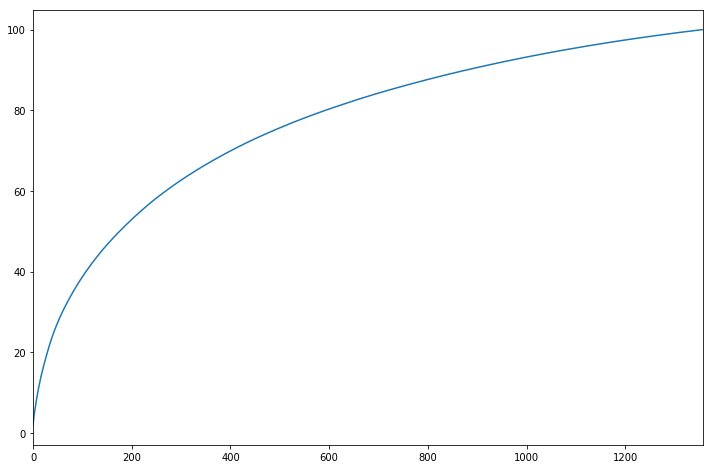

In [28]:
plt.figure(figsize=(12,8))
plt.plot(range(len(cum_sum)), cum_sum)
plt.xlim((0, len(cum_sum)))
#plt.hlines(50, 0, len(cum_sum))

### posts over time / subreddits over time


In [32]:
import datetime
from dateutil.relativedelta import relativedelta
import time

min_utc = min(df.created_utc)
min_utc = datetime.datetime.fromtimestamp(min_utc)

min_datetime = datetime.datetime(2016, 6, 1, 0, 0, 0)
max_datetime = datetime.datetime(2018, 6, 1, 0, 0, 0)
xtickdatetimes = [min_datetime,]
curr_time = min_utc

while curr_time < max_datetime:
    next_time = curr_time + relativedelta(months=3)
    xtickdatetimes.append(next_time)
    curr_time = next_time
    
xticks = [time.mktime(d.timetuple()) for d in xtickdatetimes]
xlabels = [d.strftime('%Y-%m') for d in xtickdatetimes]

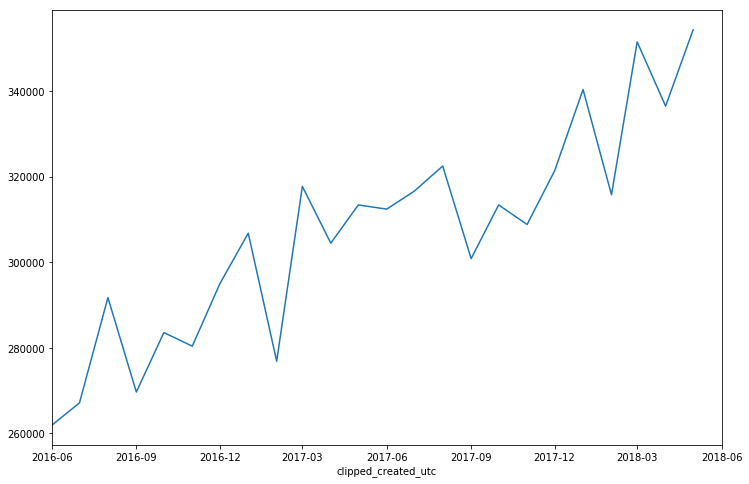

In [35]:
gb = df.groupby('clipped_created_utc')

month_counts = gb.size()

ax = month_counts.plot()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
plt.show()

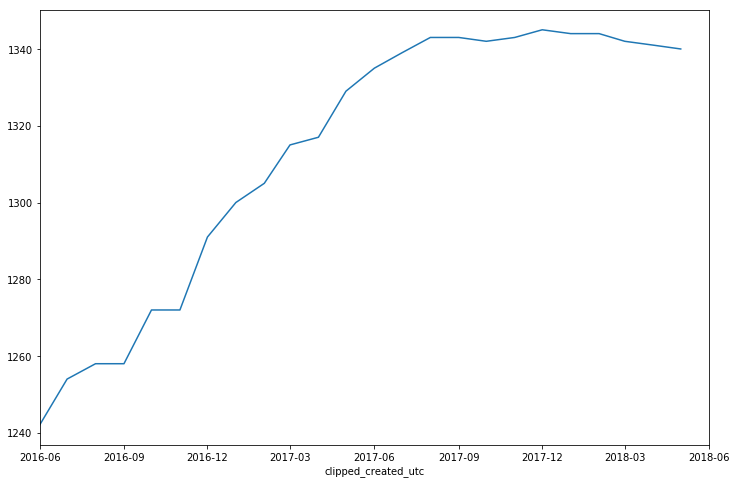

In [36]:
# number of subreddits by month

def count_subreddits(subdf):
    return len(set(subdf.subreddit))

gb = df.groupby('clipped_created_utc')

month_counts = gb.apply(count_subreddits)

ax = month_counts.plot()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
plt.show()

### words 

In [37]:
## words per post

import re

token_pattern= re.compile('(?u)\\b\\w+\\b')

def words_per_post(s):
    return len(token_pattern.findall(s))

subdf = df.sample(100000)
words_per_post = [words_per_post(s) for s in subdf.text]

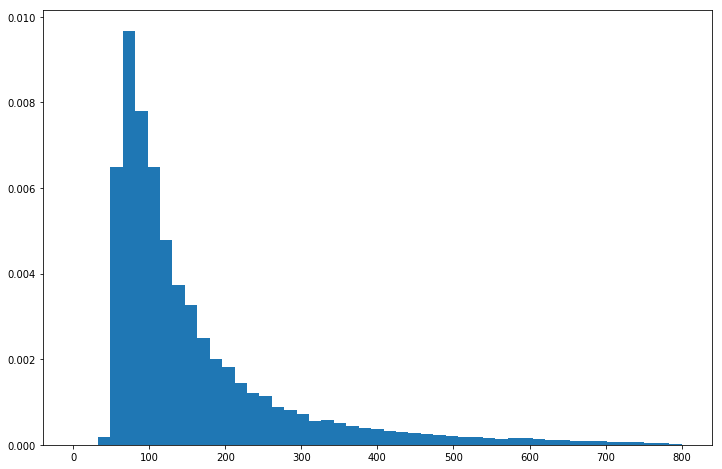

In [38]:
plt.hist(words_per_post, density=True, bins=np.linspace(0, 800, 50))
plt.show()

In [39]:
all_words = set()

for s in subdf.text:
    words = token_pattern.findall(s)
    all_words.update(words)
    
len(all_words)

286446

In [ ]:
## most common words

## 

# splitting the data

In [53]:
from sklearn.model_selection import train_test_split

test_split_time = np.percentile(df.created_utc, 80)

old_df = df[df.created_utc < test_split_time]
test_df  = df[df.created_utc >= test_split_time]

train_df, val_df = train_test_split(old_df, test_size=0.2)

In [54]:
X_train_, y_train_ = train_df.text, train_df.topic
X_val_  , y_val_   = val_df.text  , val_df.topic
X_test_ , y_test_  = test_df.text , test_df.topic

X_train_.shape, X_val_.shape, X_test_.shape

((4712525,), (1178132,), (1472665,))

# primer on bag-of-words classification

In [43]:
df.text[45], df.subreddit[45]

("Hacker and Treasure hunter are not working. It's sad. ||| So, my problem is precisely what the title says. I usually play in a duo with my husband with him as a host, and whenever I get those pesky Hacker or Treasure hunter challenges I never get any xp when I successfully accomplish them. Some research shows that the host usually doesn't have such problems while the client does. \n\nSo, what I want to know is: 1) Does anyone else have problems with those two? 2) Did any patch ever address that issue (because I know it was already brought up)?",
 'Warframe')

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(
                             max_features = 30000, 
                             ngram_range=(1,2),
                             stop_words='english',
                            )

vectorizer.build_analyzer()('the cat sat on the mat')

['cat', 'sat', 'mat', 'cat sat', 'sat mat']

In [14]:
X_train = vectorizer.fit_transform(X_train_)  ## will take ages
print('vectorizer has been fit...')
X_val   = vectorizer.transform(X_val_)
X_test  = vectorizer.transform(X_test_)

vectorizer fit has been fit...


In [49]:
#df.topic

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_all = list(df.topic)
label_encoder.fit(y_all)
y_train = label_encoder.transform(y_train_)
y_val   = label_encoder.transform(y_val_)
y_test  = label_encoder.transform(y_test_)

In [56]:
y_train

array([1153,  826, 1328, ...,  393, 1237, 1066])

In [18]:
import pickle

pickle.dump((X_train, X_val, X_test, y_train, y_val, y_test), open('training_data_v1.pkl', 'wb'))

In [57]:
import pickle

X_train, X_val, X_test, y_train, y_val, y_test = pickle.load(open('training_data_v1.pkl', 'rb'))

In [58]:
X_train

<4712525x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 301866506 stored elements in Compressed Sparse Row format>

In [61]:
301866506 / (4712525 * 30000)

0.0021352071058862642

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = nb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)

accuracy

## <- back to slides 

# macro f1 score

In [24]:
from sklearn.metrics import accuracy_score, f1_score

y_val_pred = nb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
macro_f1 = f1_score(y_val, y_val_pred, average='macro')

accuracy, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6904277279625712, 0.6214054501211126)

In [25]:
from sklearn.metrics import accuracy_score, f1_score

y_test_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
macro_f1 = f1_score(y_test, y_test_pred, average='macro')

accuracy, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.6373323192986864, 0.5693801745261076)

In [22]:
import pickle
pickle.dump((vectorizer, nb_model), open('ml_objects_v1.pkl', 'wb'))

In [ ]:
(vectorizer, nb_model) = pickle.load(open('ml_objects_v1.pkl', 'rb'))

## <- back to slides 

## feature selection

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

print('fitting vectorizer...')

vectorizer_v2 = CountVectorizer(max_features = 100000,
                                min_df=5,
                                ngram_range=(1,2),
                                stop_words='english',
                                token_pattern='(?u)\\b\\w+\\b',
                            )

X_train_v2 = vectorizer_v2.fit_transform(X_train_)  ## will take ages


fitting vectorizer...


In [15]:
import joblib

joblib.dump(X_train_v2, open('X_train_v2.pkl', 'wb'))

In [16]:
from sklearn.feature_selection import chi2, SelectKBest

max_features  = 30000
chi2_selector = SelectKBest(chi2, max_features)

chi2_selector.fit(X_train_v2, y_train)

SelectKBest(k=30000, score_func=<function chi2 at 0x7f1f16a34f28>)

In [18]:
retained_indices = set(chi2_selector.get_support(indices=True))
original_vocab = vectorizer_v2.get_feature_names()
new_vocab      = [w for ix, w in enumerate(original_vocab) if ix in retained_indices]

len(new_vocab)

30000

In [25]:
X_train_v2 = chi2_selector.transform(X_train_v2)

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [22]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(chi2_selector.transform(X_train_v2), y_train)

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [21]:
X_val_v2  =  chi2_selector.transform(vectorizer_v2.transform(X_val_))
X_test_v2 =  chi2_selector.transform(vectorizer_v2.transform(X_test_))

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [23]:
from sklearn.metrics import accuracy_score, f1_score

y_val_pred = nb_model.predict(X_val_v2)

accuracy = accuracy_score(y_val, y_val_pred)
macro_f1 = f1_score(y_val, y_val_pred, average='macro')

accuracy, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.7302823452720069, 0.671987466769985)

In [24]:
from sklearn.metrics import accuracy_score, f1_score

y_test_pred = nb_model.predict(X_test_v2)

accuracy = accuracy_score(y_test, y_test_pred)
macro_f1 = f1_score(y_test, y_test_pred, average='macro')

accuracy, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.6808255781185809, 0.6220059770074718)

## vanilla fasttext model

In [26]:
import scipy.sparse
from keras.preprocessing import sequence
from keras.layers import (GlobalAveragePooling1D, Embedding, Dropout, Input, Dense,
                          concatenate, BatchNormalization, 
                          )
from keras.models import Model

def convert_sparse_matrix_for_fasttext(sparse_matrix):
    idx_array = [list() for _ in range(sparse_matrix.shape[0])]
    for row, col, val in zip(*scipy.sparse.find(sparse_matrix)):
        idx_array[row] += [col] * 1  # val
    X = sequence.pad_sequences(idx_array, maxlen=349, padding='post', truncating='post')
    return X
    
X_train_ft = convert_sparse_matrix_for_fasttext(X_train_v2)
X_val_ft   = convert_sparse_matrix_for_fasttext(X_val_v2)
X_test_ft  = convert_sparse_matrix_for_fasttext(X_test_v2)


DROPOUT_RATE = 0.3
INPUT_LENGTH = 349
EMBEDDING_DIM = 100
MAX_FEATURES = 30000
num_classes = len(set(y_all))

nb_values = MAX_FEATURES + 2

input_ = Input(shape=(INPUT_LENGTH,))
embedding_module = Embedding(nb_values, EMBEDDING_DIM, input_length=INPUT_LENGTH)(input_)

module = GlobalAveragePooling1D()(embedding_module)
module = BatchNormalization()(module)
module = Dropout(rate=DROPOUT_RATE)(module)
module = Dense(EMBEDDING_DIM, activation='relu')(module)
module = BatchNormalization()(module)
module = Dropout(rate=DROPOUT_RATE)(module)

prediction = Dense(num_classes, activation='softmax')(module)
fasttext_model = Model(inputs=input_, outputs=prediction)
fasttext_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


fasttext_model.fit(X_train_ft, y_train, epochs = 3, validation_split=0.1)

/home/mike/.conda/envs/work/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [39]:
fasttext_model.save('fasttext_model.keras')

In [34]:
TO_TAKE = 100000

y_val_pred_proba = fasttext_model.predict(X_val_ft[:TO_TAKE])

y_val_pred = y_val_pred_proba.argmax(axis=1)

accuracy = np.mean(y_val_pred == y_val[:TO_TAKE])
macro_f1 = f1_score(y_val[:TO_TAKE], y_val_pred, average='macro')

accuracy, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.24251, 0.6983652224814777)

In [36]:
TO_TAKE = 100000

y_test_pred_proba = fasttext_model.predict(X_test_ft[:TO_TAKE])
y_test_pred = y_test_pred_proba.argmax(axis=1)
error_rate = 1 - np.mean(y_test_pred == y_test[:TO_TAKE])
macro_f1 = f1_score(y_test[:TO_TAKE], y_test_pred, average='macro')
accuracy, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.27303, 0.6663239517686133)

## prior reweight

In [37]:
ctr = Counter(y_train)

current_prior = [ctr[i] for i in range(num_classes)]
current_prior =np.array([y /  len(y_train) for y in current_prior])

ctr = Counter(y_test)

target_prior = [ctr[i] for i in range(num_classes)]
target_prior = np.array([y /  len(y_test) for y in target_prior])
target_prior

oversample_arr = target_prior / current_prior
oversample_arr = np.clip(oversample_arr, 0.01, 100)
oversample_arr

/home/mike/.conda/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


array([1.62783576, 0.94601482, 0.88617186, ..., 1.68028567, 0.89205778,
       1.09274584])

In [38]:
TO_TAKE = 100000

y_test_pred_proba = fasttext_model.predict(X_test_ft[:TO_TAKE])

y_test_pred_proba *= oversample_arr

y_test_pred = y_test_pred_proba.argmax(axis=1)

error_rate = 1 - np.mean(y_test_pred == y_test[:TO_TAKE])
macro_f1 = f1_score(y_test[:TO_TAKE], y_test_pred, average='macro')

error_rate, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.26083999999999996, 0.6818353919370107)